In [41]:
import pandas as pd
import pandas as pd  # For data handling
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
import seaborn as sns


In [42]:
#path = '/Users/shafz/OneDrive/Documents/deep-learning-final-project-yelp_reviews_classification/data/interim/'
#restaurants = pd.read_csv(path+'lemmatized_reviews_v2.csv')
restaurants = pd.read_csv('./lemmatized_reviews.csv')
restaurants.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
path = '/Users/shafz/OneDrive/Documents/deep-learning-final-project-yelp_reviews_classification/data/raw/'
business = pd.read_csv(path+'raw_business.csv')

In [44]:
restaurants.head()

,business_id,stars,text,cleaned,spell_checked,lemmatized
0,EQ-TZ2eeD_E0BHuvoaeG5Q,4,"Locals recommended Milktooth, and it's an amaz...",locals recommended milktooth and it is an amaz...,locals recommended and it is an amazing jewel ...,local recommend milktooth amazing jewel indian...
1,S2Ho8yLxhKAa26pBAm6rxA,3,"Service was crappy, and food was mediocre. I ...",service was crappy and food was mediocre i wis...,service was crappy and food was mediocre i wis...,crappy mediocre wish pick dinner town
2,ltBBYdNzkeKdCNPDAsxwAA,2,I at least have to give this restaurant two st...,i at least have to give this restaurant two st...,i at least have to give this restaurant two st...,least star decent but dinner meeting spend e...
3,Zx7n8mdt8OzLRXVzolXNhQ,5,Amazing biscuits and (fill in the blank). Grea...,amazing biscuits and fill in the blank great c...,amazing biscuits and fill in the blank great c...,amazing biscuit fill blank great cocktail high...
4,W4ZEKkva9HpAdZG88juwyQ,3,"In a word... ""OVERRATED!"". The food took fore...",in a word overrated the food took forever to c...,in a word overrated the food took forever to c...,word overrate take forever burger way overcook...


In [45]:
restaurants.isna().sum()

business_id      0
stars            0
text             0
cleaned          0
spell_checked    0
lemmatized       2
dtype: int64

For our EDA, we are going to focus on 

* Understanding the distribution of reviews (e.g. how many positive vs. negative reviews we have)
* Understand why reviews are classified as positive or negative
* Try to see if businesses can be grouped into businesses with largely positive reviews/largely negative reviews 

### EDA on text data

In [46]:
# Aggregates all of the reviews for a single business
df_grouped=restaurants[['business_id','lemmatized']].astype(str).groupby(by='business_id')['lemmatized'].apply(' '.join).reset_index()
df_grouped.head()

,business_id,lemmatized
0,-0TffRSXXIlBYVbb5AwfTg,go husband birthday fairly large group outstan...
1,-FM4CxOg4XXmX_Ebky_SiQ,wife dinner evening start think excellent tabl...
2,-Tskf8WK17rb3ZfeFuRSWA,fancy fare pass least twice day finally day de...
3,-VlBFlHwX-Pt6Xyzs9roGw,brightly light newly renovate building take co...
4,-cEFKAznWmI0cledNOIQ7w,great atmosphere quality feature interesting w...


In [47]:
## Creating a document term matrix which counts the frequency of each word in all the reviews for a given business 
cv = CountVectorizer(analyzer='word', min_df=100)
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm = df_dtm.drop(['but', 'not'], axis=1)
df_dtm.head(10)

,aback,abandon,ability,able,abound,absent,absolute,absolutely,absorb,absurd,...,yup,ze,zero,zest,zesty,zing,zip,zone,zoo,zucchini
0,1,0,2,48,0,2,6,70,1,1,...,1,1,2,0,2,1,0,1,0,1
1,0,1,1,50,0,3,7,70,0,0,...,0,1,4,3,0,0,0,2,0,3
2,0,0,1,51,1,0,17,83,0,0,...,0,0,6,1,0,0,1,3,0,2
3,1,1,3,58,0,0,14,78,0,1,...,0,2,5,0,3,1,0,2,2,2
4,0,1,1,40,0,0,9,96,0,0,...,3,0,3,0,2,1,0,3,0,12
5,1,0,0,33,0,2,5,67,0,2,...,0,0,6,0,0,0,0,0,0,5
6,0,0,0,62,0,1,8,59,2,0,...,1,1,11,0,1,0,0,1,0,0
7,4,0,2,101,0,1,21,156,2,2,...,3,0,12,1,0,1,0,2,0,0
8,0,0,1,33,1,0,7,58,1,1,...,1,0,4,0,2,1,0,0,0,1
9,0,0,1,40,1,0,9,85,4,0,...,0,0,3,2,1,0,0,0,0,0


In [48]:
## Sets the index of the document term matrix as the business id 
df_dtm.index=df_grouped['business_id']

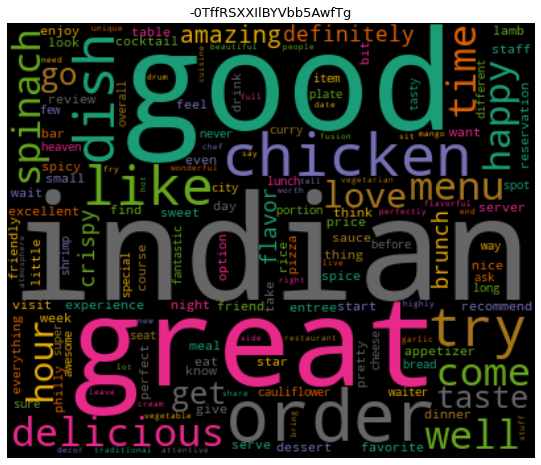

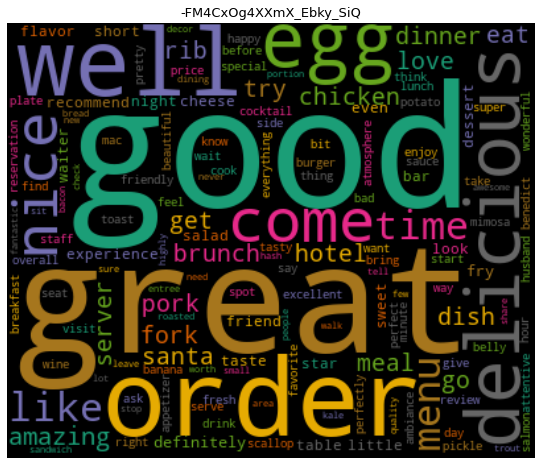

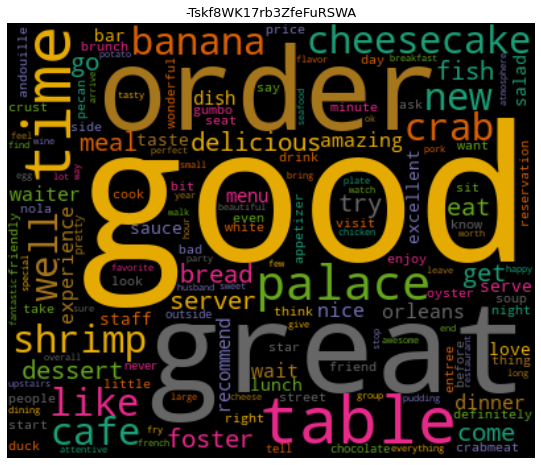

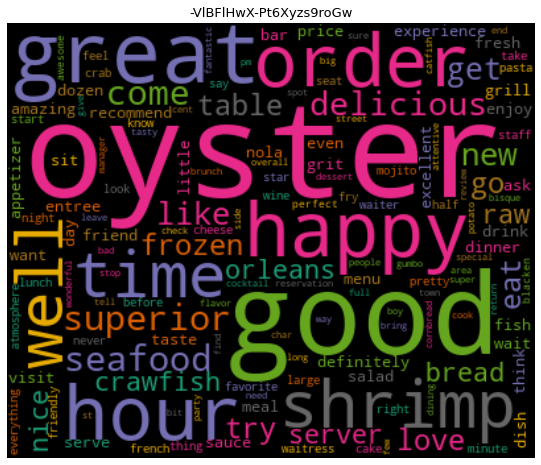

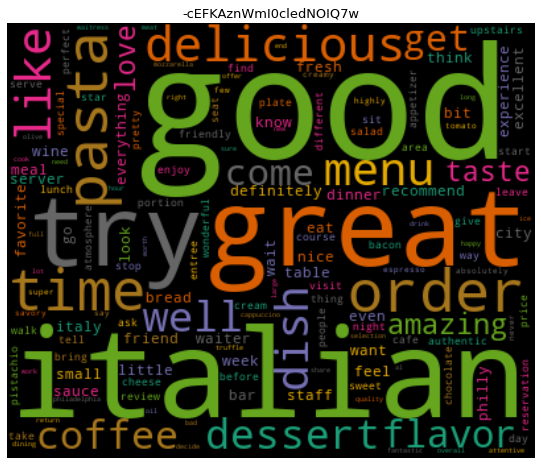

In [49]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)  
  if index == 4:
    break

## Using TextBlob for basic sentiment analysis of reviews

In [50]:
restaurants['polarity']=restaurants['lemmatized'].astype(str).apply(lambda x:TextBlob(x).sentiment.polarity)

In [51]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(restaurants.iloc[restaurants['polarity'].sort_values(ascending=False)[:5].index]['text']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 Excellent food and service! Wouldn't hesitate to return next time I'm in Santa Barbara!
Review 2:
 I wish I could afford to eat here for every meal.  You have to try the dumplings and the chocolate chip bread putting.  So delicious!
Review 3:
 Was there for the first days of corona shut down. Had coffee and beignets and sat on the steps to the court house... was perfect regardless of the chaos of everything shutting down.
Review 4:
 Closest thing to nyc pizza you'll get on the East Side. Only Manny's and Pizza Perfect come close.
Review 5:
 Excellent vegan fare.  The saitan is delicious on the nachos, which taste like nachos!


In [52]:
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(restaurants.iloc[restaurants['polarity'].sort_values(ascending=False)[-5:].index]['text']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 Customer service was horrible everywhere we went. I will never go back or spend another penny. The waitresses and management treated us like an inconvenience.
Review 2:
 Horrible service. Waiter doesn't know what he is doing. Spends way too much time at the computer doing something and neglecting patrons. Wouldn't recommend sitting in the indoor courtyard.
Review 3:
 Truly miserable experience. Be prepared. They will leave 20 minutes ahead of schedule then not tell you where the tour is expecting you to run and find them. No joke.
Review 4:
 This is where TSA agents come to
Work when they get fired. Service was horrible!! I wouldn't come if it was the only place in NOLA. Food was airport  quality.
Review 5:
 Wanted to try this  place, walked by it several times. Did my research on yelp and saw pics by other yelp users. Service was horrible and by looking around several tables had not been served or had drinks. So therefore I walked out 

### We can see from the above that some reviews are mixed and are not entirely positive or negative while others are very clear cut. Perhaps our models should consider a neutral option in classification as well

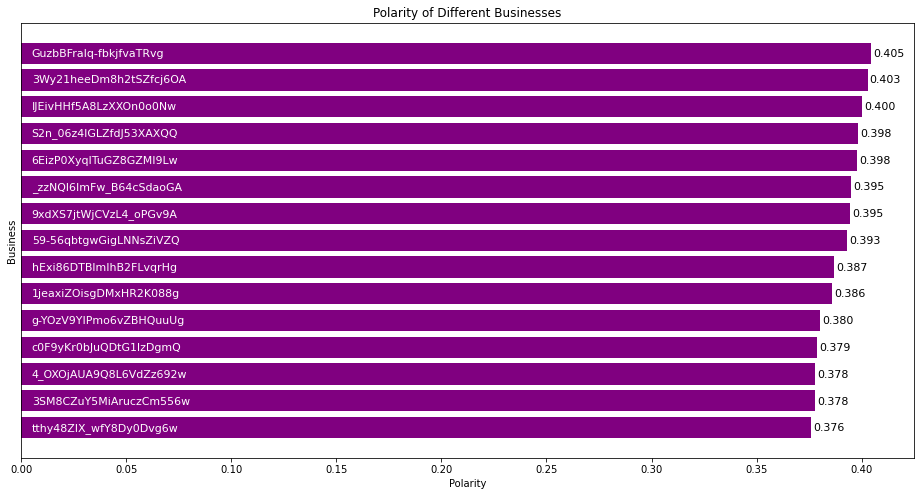

In [53]:
product_polarity_sorted=pd.DataFrame(restaurants.groupby('business_id')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Business')
plt.title('Polarity of Different Businesses')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted[-15:].index)),product_polarity_sorted['polarity'][-15:],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted[-15:].index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity'][-15:]):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [54]:
top_15 = product_polarity_sorted[-15:].index.tolist()
business.loc[business['business_id'].isin(top_15)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
23331,IJEivHHf5A8LzXXOn0o0Nw,Skull's Rainbow Room,222 Printers Aly,Nashville,TN,37201,36.164652,-86.778809,4.5,993,1,"{'HappyHour': 'True', 'BusinessParking': ""{'ga...","American (New), Public Services & Government, ...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-2:0', '..."
32697,c0F9yKr0bJuQDtG1lzDgmQ,Craft Street Kitchen - Oldsmar,3153 Curlew Rd,Oldsmar,FL,34677,28.049304,-82.700597,4.5,1013,1,"{'CoatCheck': 'False', 'RestaurantsAttire': ""'...","Breakfast & Brunch, Restaurants, Beer Bar, Nig...","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'..."
50533,4_OXOjAUA9Q8L6VdZz692w,Naan & Kabab,2740 S Virginia St,Reno,NV,89502,39.498616,-119.799314,4.0,1266,0,"{'NoiseLevel': ""u'average'"", 'OutdoorSeating':...","Greek, Persian/Iranian, Restaurants, Mediterra...","{'Monday': '13:0-21:0', 'Tuesday': '16:0-20:0'..."
60764,3SM8CZuY5MiAruczCm556w,Barbacoa Grill,276 W Bobwhite Ct,Boise,ID,83706,43.597584,-116.183693,4.0,1099,1,"{'RestaurantsAttire': ""u'casual'"", 'Caters': '...","Nightlife, Latin American, Steakhouses, Seafoo...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-22:0', ..."
80918,g-YOzV9YIPmo6vZBHQuuUg,Bakersfield,201 3rd Ave S,Nashville,TN,37201,36.159296,-86.774733,4.5,1215,1,"{'RestaurantsPriceRange2': '2', 'Caters': 'Tru...","Restaurants, Sandwiches, Bars, Nightlife, Tex-...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-23:0', ..."
85427,3Wy21heeDm8h2tSZfcj6OA,Lure Fish House,"3815 State St, Ste G131",Santa Barbara,CA,93105,34.438849,-119.748164,4.5,1453,1,"{'CoatCheck': 'False', 'RestaurantsPriceRange2...","Breakfast & Brunch, Food, Beer, Wine & Spirits...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
104154,6EizP0XyqITuGZ8GZMI9Lw,Toma Restaurant & Bar,324 West Cabrillo Blvd,Santa Barbara,CA,93101,34.408633,-119.693496,4.5,1084,1,"{'BikeParking': 'True', 'Alcohol': ""u'full_bar...","American (New), Italian, Bars, Restaurants, Ni...","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
112455,_zzNQl6ImFw_B64cSdaoGA,Seabreeze Island Grill,17855 Gulf Blvd,Redington Shores,FL,33708,27.829380,-82.830446,4.0,1108,1,"{'BusinessAcceptsBitcoin': 'False', 'HasTV': '...","Caribbean, American (Traditional), Restaurants...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
113207,tthy48ZIX_wfY8Dy0Dvg6w,Bouchon,9 W Victoria St,Santa Barbara,CA,93101,34.423983,-119.705860,4.5,1452,1,"{'Corkage': 'True', 'BusinessParking': ""{'gara...","Seafood, Bars, Wine Bars, American (New), Rest...","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
114413,59-56qbtgwGigLNNsZiVZQ,Snapper's Sea Grill,5895 Gulf Blvd,St. Pete Beach,FL,33706,27.732162,-82.744417,4.5,1388,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Steakhouses, Wine Bars, Bars, Sea...","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'..."


### As expected, the average rating for all the restaurants with the highest polarity are 4.0 or greater. Interestingly, no restaurant has a perfect 5 stars

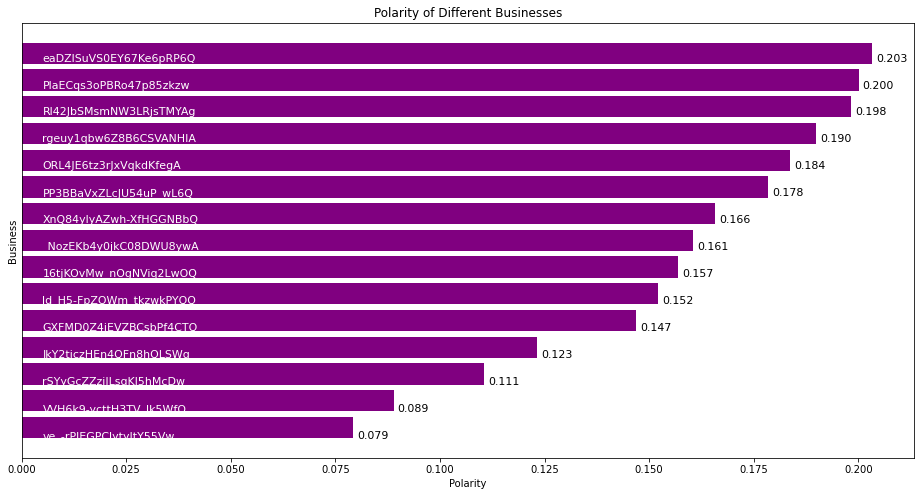

In [55]:
plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Business')
plt.title('Polarity of Different Businesses')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted[:15].index)),product_polarity_sorted['polarity'][:15],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted[:15].index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity'][:15]):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [56]:
bottom_15 = product_polarity_sorted[:15].index.tolist()
business.loc[business['business_id'].isin(bottom_15)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
181,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,TN,37214,36.211592,-86.694319,3.0,1639,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Venues & Event Spaces, Performing Arts, Arts &...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
9924,eaDZlSuVS0EY67Ke6pRP6Q,Penang,117 N 10th St,Philadelphia,PA,19107,39.954044,-75.155980,3.5,1112,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Malaysian, Asian Fusion, Cambodian, Chinese, R...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
39972,rSYyGcZZziJLsqKl5hMcDw,Circus Circus Reno,500 N Sierra St,Reno,NV,89503,39.532201,-119.815363,2.5,1249,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Hotels & Travel, Casinos, Hotels, Event Planni...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
45144,16tjKOvMw_nOgNViq2LwOQ,Hattie B's Hot Chicken - Nashville West,5209 Charlotte Pk,Nashville,TN,37209,36.151626,-86.850757,4.5,1334,1,"{'RestaurantsAttire': ""'casual'"", 'BusinessAcc...","Beer Bar, Bars, Southern, Soul Food, Restauran...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
57332,IkY2ticzHEn4QFn8hQLSWg,Geno's Steaks,1219 S 9th St,Philadelphia,PA,19147,39.933837,-75.158814,2.5,3401,1,"{'RestaurantsReservations': 'False', 'Corkage'...","Sandwiches, Cheesesteaks, Steakhouses, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
70269,ve_-rPlEGPClytyJtY55Vw,Nugget Casino Resort,1100 Nugget Ave,Sparks,NV,89431,39.533177,-119.755731,2.5,1576,1,"{'RestaurantsAttire': ""'casual'"", 'Ambience': ...","Resorts, Event Planning & Services, Restaurant...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
71145,XnQ84ylyAZwh-XfHGGNBbQ,Coop's Place,1109 Decatur St,New Orleans,LA,70116,29.960157,-90.059854,3.5,3157,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...","Cajun/Creole, Nightlife, Bars, Restaurants","{'Monday': '11:0-23:0', 'Thursday': '11:0-23:0..."
73096,VVH6k9-ycttH3TV_lk5WfQ,Willie Mae's Scotch House,2401 St Ann St,New Orleans,LA,70119,29.969195,-90.078964,4.5,3582,1,"{'RestaurantsReservations': 'False', 'NoiseLev...","Comfort Food, Restaurants, Southern","{'Monday': '11:0-15:0', 'Tuesday': '11:0-15:0'..."
87130,ld_H5-FpZOWm_tkzwkPYQQ,Silver Legacy Resort Casino,407 N Virginia St,Reno,NV,89501,39.530502,-119.814995,3.0,1534,1,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","Arts & Entertainment, Hotels, Party & Event Pl...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
91757,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.151387,-86.796603,4.5,6093,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Chicken Shop, Southern...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."


Unexpectedly, many restaurants with a low polarity have an average star rating of 4 or 4.5. Perhaps the star ratings are skewed or fudged or perhaps the sentiment analysis was inaccurate. Need to look into this furthur to figure out the cause of the discrepancy. 

## EDA on Star Ratings

Text(0.5, 1.0, 'Percent of Star Rating')

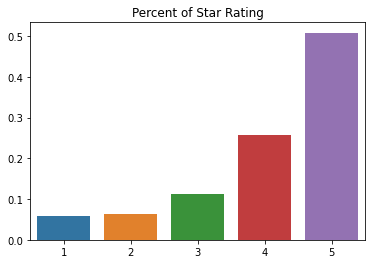

In [57]:
star_counts = list(restaurants['stars'].value_counts()/len(restaurants))

sns.barplot(x=[5,4,3,2,1], y = star_counts)
plt.title('Percent of Star Rating')

In [58]:
avg_rev_len = restaurants['text'].apply(len).mean()
print(avg_rev_len)

552.1770369536065


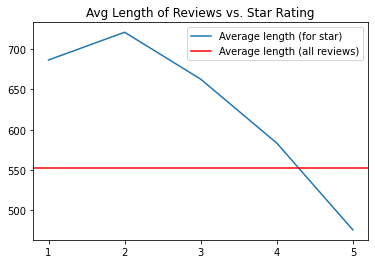

In [59]:
avg_len = []
for rating in np.arange(1,6):
    star = restaurants.loc[restaurants['stars'] == rating]
    avg_len.append(star['text'].apply(len).mean())

x = np.arange(1,6)
plt.plot(x, avg_len, label = 'Average length (for star)')
plt.xticks([1,2,3,4,5], x)
plt.axhline(y=avg_rev_len, color='r', label='Average length (all reviews)')
plt.title('Avg Length of Reviews vs. Star Rating')
plt.legend()
plt.show()